In [64]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
from copy import deepcopy
from ggplot import *
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import pylab as pl
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

In [2]:
df = pd.read_csv("wine.csv",";")

In [ ]:
df = df.drop('quality',axis = 1)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
f1 = df['pH'].values
f2 = df['density'].values

In [28]:
f1

array([ 3.51,  3.2 ,  3.26, ...,  3.42,  3.57,  3.39])

In [29]:
X= np.matrix(list(zip(f1,f2)))

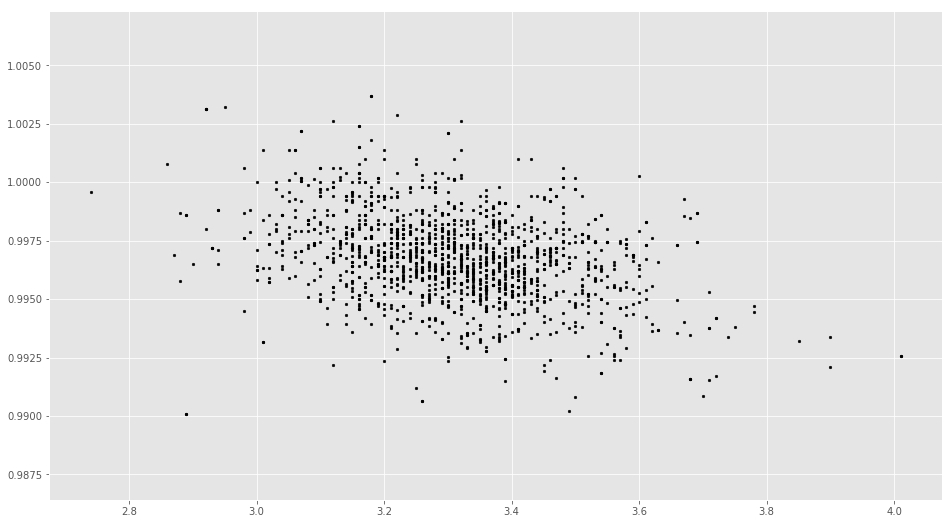

In [30]:
plt.scatter(f1, f2, c='black', s=7)

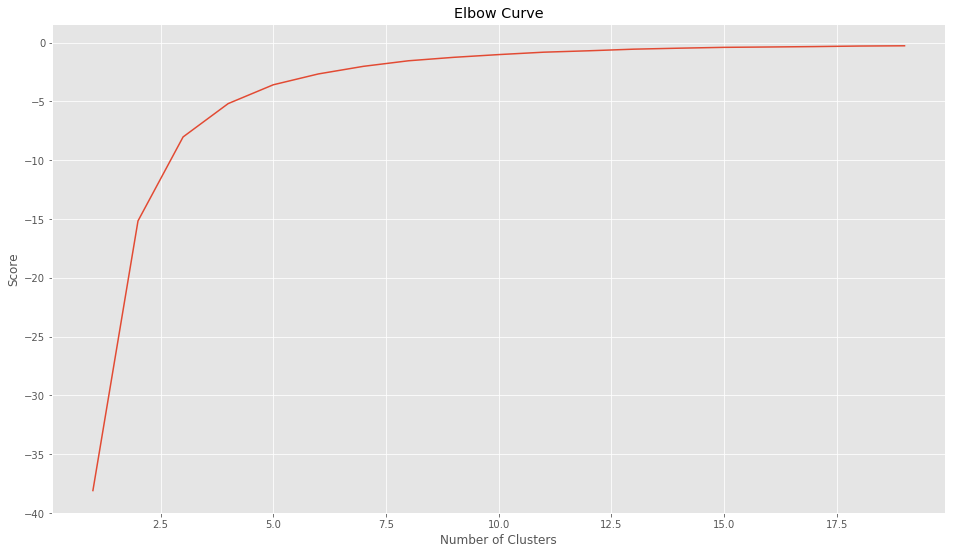

In [55]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [31]:
kmeans = KMeans(n_clusters=2).fit(X)

In [42]:
df['lable'] = kmeans.labels_

In [43]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,lable
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


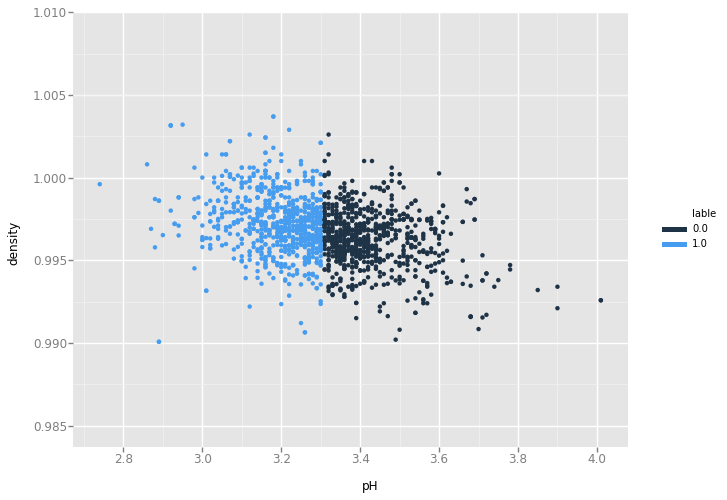

<ggplot: (289525638)>

In [50]:
ggplot(df, aes(x= 'pH', y= 'density', color= 'lable') ) + geom_point()

In [58]:
kmeans = KMeans(n_clusters=3).fit(X)
df['lable3'] = kmeans.labels_

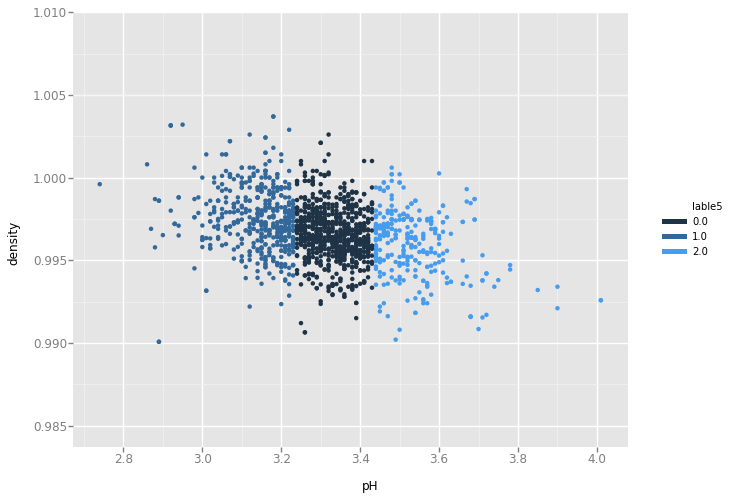

<ggplot: (-9223372036565116121)>

In [59]:
ggplot(df, aes(x= 'pH', y= 'density', color= 'lable5') ) + geom_point()

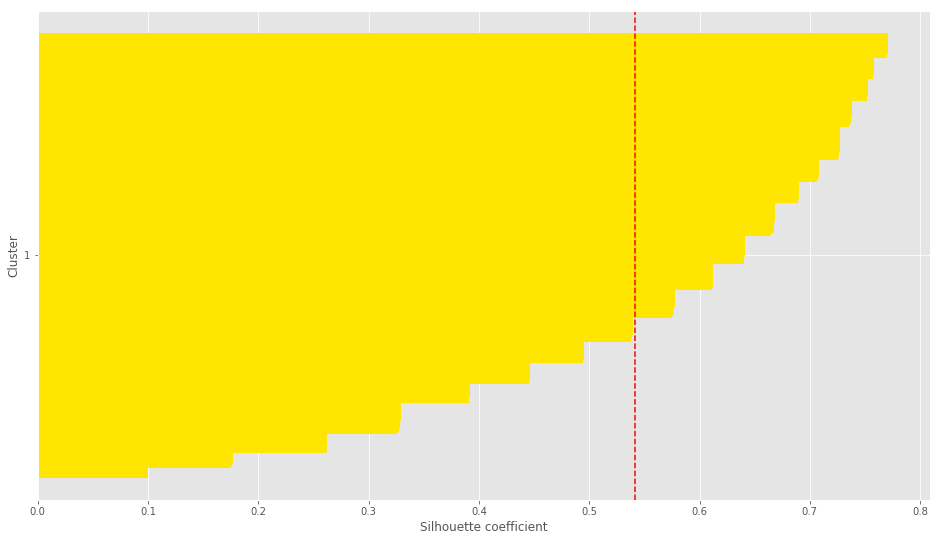

In [81]:
km = KMeans(n_clusters=3,
             init='k-means++',
             n_init=10,
             max_iter=300,
             tol=1e-04,
             random_state=0)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[y_km == c]
     c_silhouette_vals.sort()
    
y_ax_upper += len(c_silhouette_vals)
color = cm.jet(float(i)/n_clusters)

plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height = 1.0, edgecolor = 'none', color = color)

yticks.append((y_ax_lower + y_ax_upper)/2.)
y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,color="red",linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()